In [1]:
#1.Data Preprocessing

In [2]:
#Importing the libraries
import numpy as np       
import matplotlib.pyplot as plt   
import pandas as pd  


In [3]:
dataset_train = pd.read_csv('ADBL_train_data.csv')
dataset_train

,Symbol,Date,Open,High,Low,Close,Vol
0,ADBL,2012-01-01,115.0,115.0,113.0,114.0,"1,111"
1,ADBL,2012-01-02,114.0,118.0,115.0,118.0,551
2,ADBL,2012-01-03,118.0,116.0,114.0,115.0,490
3,ADBL,2012-01-04,115.0,115.0,113.0,114.0,"3,220"
4,ADBL,2012-01-05,114.0,114.0,112.0,113.0,775
...,...,...,...,...,...,...,...
1885,ADBL,2020-02-12,392.0,392.0,383.0,388.0,"34,048"
1886,ADBL,2020-02-13,386.0,388.0,380.0,384.0,"20,972"
1887,ADBL,2020-02-16,385.0,390.0,383.0,390.0,"29,836"
1888,ADBL,2020-02-17,392.0,401.0,390.0,396.0,"42,746"


In [4]:
training_set=dataset_train.iloc[:,5:6].values
training_set

array([[114.],
       [118.],
       [115.],
       ...,
       [390.],
       [396.],
       [398.]])

In [5]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
training_set_scaled

array([[0.01325178],
       [0.01732926],
       [0.01427115],
       ...,
       [0.29459735],
       [0.30071356],
       [0.30275229]])

In [6]:
X_train=[]
y_train=[]
for i in range(60,1890):
    X_train.append(training_set_scaled[i-60:i , 0])
    y_train.append(training_set_scaled[i , 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
X_train

array([[0.01325178, 0.01732926, 0.01427115, ..., 0.00407747, 0.00509684,
        0.00407747],
       [0.01732926, 0.01427115, 0.01325178, ..., 0.00509684, 0.00407747,
        0.00509684],
       [0.01427115, 0.01325178, 0.01223242, ..., 0.00407747, 0.00509684,
        0.00509684],
       ...,
       [0.3088685 , 0.31396534, 0.30988787, ..., 0.28950051, 0.29255861,
        0.28848114],
       [0.31396534, 0.30988787, 0.31396534, ..., 0.29255861, 0.28848114,
        0.29459735],
       [0.30988787, 0.31396534, 0.3088685 , ..., 0.28848114, 0.29459735,
        0.30071356]])

In [8]:
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [9]:
#2 Building RNN

In [11]:
#importing keras library and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [12]:
#Initialising the RNN
regressor = Sequential()

In [13]:
#Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50,return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [14]:
#Adding a second LSTM layer and some Droput regularisation
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [15]:
#Adding a third LSTM layer and some Droput regularisation
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [16]:
#Adding a fourth LSTM layer and some Droput regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [17]:
#Adding the output Layer
regressor.add(Dense(units = 1))

In [18]:
#Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
#Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100,batch_size = 32)

Epoch 1/100
58/58 [==============================] - 9s 71ms/step - loss: 0.0292
Epoch 2/100
58/58 [==============================] - 4s 67ms/step - loss: 0.0038
Epoch 3/100
58/58 [==============================] - 4s 62ms/step - loss: 0.0033
Epoch 4/100
58/58 [==============================] - 4s 67ms/step - loss: 0.0028
Epoch 5/100
58/58 [==============================] - 4s 65ms/step - loss: 0.0036
Epoch 6/100
58/58 [==============================] - 4s 71ms/step - loss: 0.0029
Epoch 7/100
58/58 [==============================] - 4s 72ms/step - loss: 0.0025
Epoch 8/100
58/58 [==============================] - 4s 64ms/step - loss: 0.0027
Epoch 9/100
58/58 [==============================] - 4s 65ms/step - loss: 0.0030
Epoch 10/100
58/58 [==============================] - 4s 65ms/step - loss: 0.0025
Epoch 11/100
58/58 [==============================] - 4s 67ms/step - loss: 0.0022
Epoch 12/100
58/58 [==============================] - 4s 64ms/step - loss: 0.0022
Epoch 13/100
58/58 [=====

In [20]:
#3.Making the prediction and visualising the results

In [21]:
#Getting the real stock price of next months
dataset_test = pd.read_csv('ADBL_test_data.csv')
real_stock_price = dataset_test.iloc[:,5:6].values

In [22]:
#Getting the predicted stock price of next month
dataset_total = pd.concat((dataset_train['Close'],dataset_test['Close']),axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

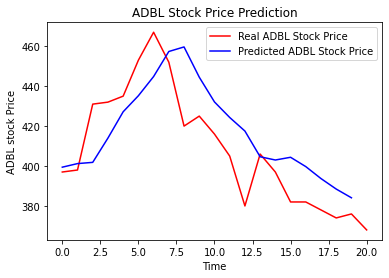

In [23]:
plt.plot(real_stock_price, color = 'red', label = 'Real ADBL Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted ADBL Stock Price')
plt.title('ADBL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ADBL stock Price')
plt.legend()
plt.show()